--------------------------------------------
# **COVID-19 Vaccine Case Study**
--------------------------------------------
The dataset and problem statements were provided as part of the MIT Applied Data Science Program. 

Analysis completed by Deepikaa Sriram

--------------------
## **Context** 
--------------------

Medicon, a pharmaceutical company, has manufactured the sixth batch (40,000 units) of COVID-19 vaccine doses. **This vaccine was clinically tested last quarter and around 200,000 doses have already been given to people in five batches.**

Now, the sixth batch of doses needs to be tested for their **time of effect** (measured as the **time taken for the dose to be absorbed in the body for its COVID-19 preventative effects** such as antibody creation, to manifest), as well as for **quality assurance** (which tells you whether the dose will be able to do a satisfactory job or not).

You are working with the quality assurance team of Medicon and want to understand the quality of the sixth batch so that the company can plan for the next batch of doses. 

**Note:** Please note that this is not a clinical trial, the vaccine has already cleared clinical trials. This test is to ensure the quality and effectiveness of the sixth batch.

## **Objective** 
------------------------

The Medicon Quality Assurance team conducted a previous analysis, which indicated that a dose is ten times more likely to produce a satisfactory result than not.


**Note:** Here, a satisfactory job for the vaccine means that the dose **has successfully prevented COVID-19** - which is assumed to have taken place if the person does not show any symptoms or side effects after 14 days have passed since the vaccine dose was administered.

In [53]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

import scipy.stats as stats

In [5]:
df = pd.read_csv('doses.csv')
df.head()

,drug_serial_number,time_of_effect
0,672,5.8
1,895,17.3
2,518,16.7
3,448,13.1
4,402,13.6


The dataset contains doses represented by the drug serial number, which is a discrete variable. It also contains the time of effect (# of hours) for the dose to be absorbed in the body to generate COVID-19 antibodies, which is a continuous variable. 

## Q1. The quality assurance team has collected 100 volunteers who were ready for the trial of this new batch, and they have given one dose to each volunteer. Help the team answer the following questions:


a) **Plot the probability distribution** for the number of unsatisfactory doses.

b) What is the probability that **exactly 3 doses will not do a satisfactory job**?

c) What is the probability that **at most 3 doses will not do a satisfactory job** out of 100 selected?

### Plot the probability distribution for the number of unsatisfactory doses. 

The number of unsatisfactory doses would best be characterized by a **binomial distribution** because there are a fixed number of trials (n) with only two possible outcomes (success/failure) that are independent of one another and have an equal probability of occurrence. 

The Medicon QA team reported that it is **10x more likely that a dose will be satisfactory rather than unsatisfactory**. 

Let p = the probability that the dose will be unsatisfactory (successful) 

Therefore the probability that a dose will be unsatisfactory can be calculated by: 

$p + 10p = 1$

$p = 0.09$ 

**The probability that a dose will be unsatisfactory is 0.09** 

In [31]:
#set n as the number of doses
n=100

#set p as the probability the dose will be unsatisfactory 
p=0.09

#set k as the number of doses in the numpy array 
k = np.arange(0,101)

k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100])

In [10]:
from scipy.stats import binom
binomial = binom.pmf(k=k, n=n, p=p)

binomial

array([8.01935118e-005, 7.93122644e-004, 3.88281470e-003, 1.25444783e-002,
       3.00860701e-002, 5.71304716e-002, 8.94625517e-002, 1.18815257e-001,
       1.36604904e-001, 1.38106057e-001, 1.24295451e-001, 1.00578737e-001,
       7.37761613e-002, 4.93919862e-002, 3.03562992e-002, 1.72130224e-002,
       9.04393005e-003, 4.41965812e-003, 2.01555838e-003, 8.60313523e-004,
       3.44598109e-004, 1.29832882e-004, 4.61094802e-005, 1.54652915e-005,
       4.90725596e-006, 1.47541234e-006, 4.20922794e-007, 1.14096288e-007,
       2.94196474e-008, 7.22392251e-009, 1.69087417e-009, 3.77614579e-010,
       8.05283837e-011, 1.64113789e-011, 3.19846848e-012, 5.96511861e-013,
       1.06519975e-013, 1.82226034e-014, 2.98791675e-015, 4.69782347e-016,
       7.08545353e-017, 1.02550118e-017, 1.42475439e-018, 1.90064347e-019,
       2.43514011e-020, 2.99709552e-021, 3.54410483e-022, 4.02720353e-023,
       4.39783902e-024, 4.61580772e-025, 4.65638625e-026, 4.51491879e-027,
       4.20769059e-028, 3

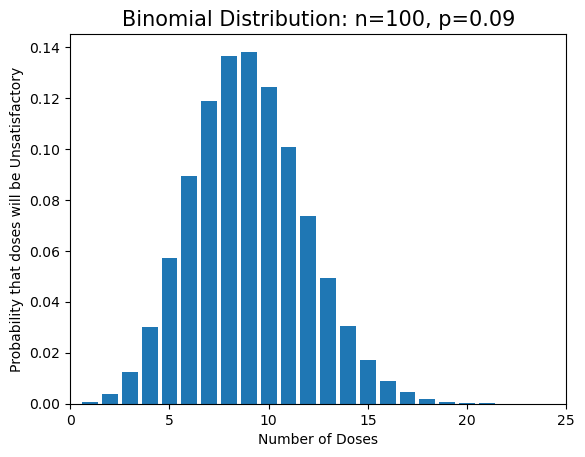

In [22]:
plt.bar(k, binomial)
plt.xlim(0,25)
plt.title('Binomial Distribution: n=100, p=0.09', fontsize=15)
plt.xlabel('Number of Doses')
plt.ylabel('Probability that doses will be Unsatisfactory')
plt.show()

### What is the probability that exactly 3 doses will not do a satisfactory job?

In [15]:
binomial[3]

0.012544478265088905

**The probability that exactly 3 doses will not do an satisfactory job is 1.25%**

### What is the probability that at most 3 doses will not do a satisfactory job out of the 100 selected?

Let x= the number of doses that will not do a satisfactory job.

To determine the $p(x<=3)$:   

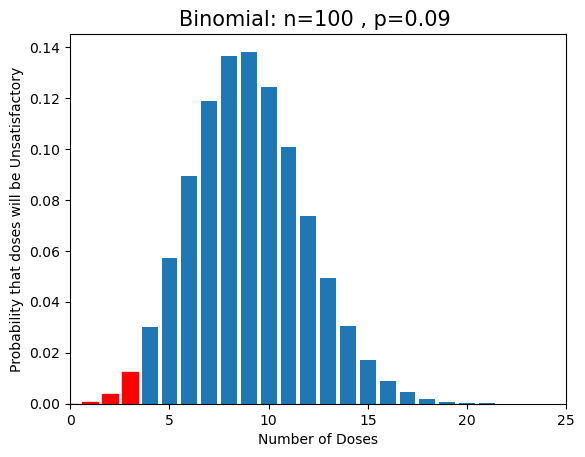

In [23]:
barl = plt.bar(k, binomial)
plt.title("Binomial: n=100 , p=0.09 ", fontsize=15) # set the title
plt.xlim(0,25)
plt.xlabel("Number of Doses") 
plt.ylabel("Probability that doses will be Unsatisfactory") 
for i in range(0, 4):
    barl[i].set_color("r") 
plt.show()

In [21]:
from scipy.stats import binom

probability_atmost3 = binom.cdf (k=3, n=n, p=p)

print (probability_atmost3)

0.017300609121718068


**The probability that at most 3 doses will not do a satisfactory job is 1.73%**

## Q2. The New York city administration wants to buy 200 doses for Healthcare workers who tested positive for COVID-19. They have contacted the company and requested 200 doses. What is the probability that **at least 30 doses will not do a satisfactory job** out of 200 doses?

In [24]:
#set n as the number of doses
n=200

#set p as the probability the dose will be unsatisfactory 
p=0.09

#set k as the number of doses in the numpy array 
k = np.arange(0,201)

k

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [25]:
from scipy.stats import binom
binomial = binom.pmf(k = k, n = n, p = p)

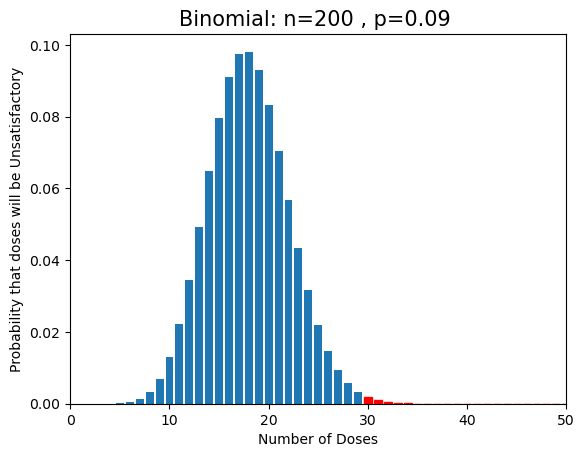

In [28]:
barl = plt.bar(k, binomial)
plt.title("Binomial: n=200 , p=0.09 ", fontsize=15) # set the title
plt.xlim(0,50)
plt.xlabel("Number of Doses") 
plt.ylabel("Probability that doses will be Unsatisfactory") 
for i in range(30, 201):
    barl[i].set_color("r") 
plt.show()

In [29]:
probability_atleast30 = 1-binom.cdf(k=29, n=200, p=0.09)
print(probability_atleast30)

0.003963863923503452


**The probability that at least 30 doses will not do a satisfactory job is ~0.4%**

## Q3. The quality assurance team wants to analyze the **time of effect for doses**. So, they have enlisted help from 50 volunteers with the assistance of the city administration, and gave one dose to each volunteer. Data for these 50 doses are in the 'doses.csv' file. Based on this sample, answer the following questions:

a) What is the probability that the time of effect is **less than 11.5 hours**?

b) What is the **90th percentile of time of effect for the doses**?

c) For the effectiveness test of the vaccine, estimate the **range which will contain the population mean (time of effect) with a 95% confidence level.**

### What is the probability that the time of effect is **less than 11.5 hours**?

In [33]:
from scipy.stats import norm
mean = df['time_of_effect'].mean()
stdev = df['time_of_effect'].std()

print('The average time of effect is', round(mean,2))
print('The standard deviation of the time of effect is', round(stdev,2))

The average time of effect is 13.44
The standard deviation of the time of effect is 4.75


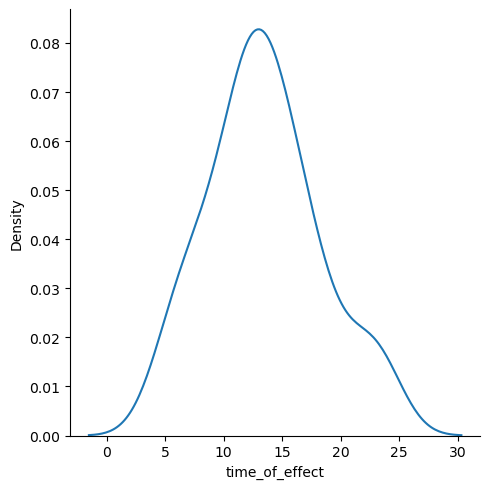

In [34]:
import seaborn as sns
sns.displot(df['time_of_effect'], kind="kde")

The shape of the distribution is not perfectly normal. 

We could assume that as the number of observations increase, the distribution would tend towards normal. 

In [40]:
probability_11 = norm.cdf(11.5, mean, stdev)
print(round(probability_11, 4))

0.3412


The probability that a dose will take less than 11.5 hours is approximately 34.12% 

### What is the 90th percentile of the time of effect for the doses?

In [47]:
percentile_90th = norm.ppf(0.9, mean, stdev)
print(round(percentile_90th, 2))

19.52


The 90th percentile for the time of effect is 19.52 hours 

### For the effectiveness test of the vaccine, estimate the range which will contain the population mean (time of effect) with a 95% confidence level.

Given that we don't know the population standard deviation, it's best to calculate the confidence interval using the t-distribution. 

In [51]:
from scipy.stats import t

x_bar, s = mean, stdev
n = 50
k = n-1
np.round(t.interval(0.95, df = k, loc=x_bar, scale = s / np.sqrt(n)), 2)

array([12.09, 14.79])

95% of the time, the population mean (time of effect) will fall within the interval 12.09 hours and 14.79 hours.